# Sentiment Analysis
Die **"Stimmungsanalyse"** gehört zu den **Natural Language Processing (NLP)** Modellen.<br>
Meist ermöglicht die Sentiment Analysis eine Klassifizierung von wenigen Sätzen anhand einer der folgenden Kriterien: 
* **Wertung:** Negativ, Neutral, Positiv
* **Themengebiet**, über das geschrieben wird
* **Informationen zur Person** hinter der Meinung <br>

**Idee:** Viele Daten auf die **wesentlichen Informationen** (den Nutzen) herunterbrechen, z.B. bei Marktanalysen, Produktrezensionen oder Kundenservices.

## Recurrent Neural Networks (RNNs)
Besondere Architektur für **sequentielle Daten** wie Texte.
Klassische neuronale Netze arbeiten Buchstaben für Buchstaben eines Textes ab, sehen keinen Zusammenhang. <br><br>
**Idee:** Ausgang des Netzes abhängig vom **aktuellen und den vorherigen Buchstaben**. Die Berechnung der Vorherigen wiederholt sich damit - *recurrent*. Bildlich gesprochen haben RNNs ein Kurzzeitgedächtnis.<br><br>
**Problem:** Betrachtbare Sequenz zwar theoretisch unendlich lange, praktisch jedoch **hohe Rechenleistung für Wiederholungen** erforderlich.

## Long Short-Term Memory networks (LSTMs)
**Lösung:** "Kurzes" Kurzzeitgedächtnis des RNNs soll zu einem **"langen Kurzzeitgedächtnis"** ausgebaut werden.<br>
 <br> **Idee:** Komplexere Architektur mit **Zellen, die Bedeutung einzelner, längerer Sequenzen speichern** und zusammenfügen soll. Einzelne Informationen können vergessen, in Kontext zu anderen Informationen gebracht oder durch neue Informationen ergänzt werden (durch Forget, Output und Input Gates)

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
assert tf.__version__.startswith('2.')
#tf.debugging.set_log_device_placement(True)

# fix random seed for reproducibility
tf.random.set_seed(22)
np.random.seed(7)

In [3]:
def plotHistory(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [4]:
# only keep the top n most used words, zero the rest
top_words = 20000
# load the dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=top_words)
print("Number of different words in Training Data:", len(np.unique(np.hstack(X_train))))
print("Number of different words in Testing Data:", len(np.unique(np.hstack(X_test))))

Number of different words in Training Data: 19998
Number of different words in Testing Data: 19490


In [5]:
print('X_train:', X_train[0:3], '...')
print('y_train:', y_train[0:3], '...')

X_train: [list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 

Review length: 
Mean 238.71 words (176.493674)


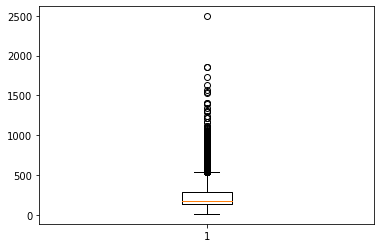

Maximum length num words of review in training data: 2494
Maximum length num words of review in testing data: 2315


In [6]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X_train]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()
print("Maximum word length training data:", (max([len(sequence) for sequence in X_train])))
print("Maximum word length testing data:", (max([len(sequence) for sequence in X_test])))

In [7]:
# maximal number of words in one review - truncate and pad input sequences accordingly
max_review_length = 1000
print('Before padding: ', len(X_train[0]), '-', len(X_train[1]), '-', len(X_train[2]))
x_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_review_length)
x_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_review_length)
print('After padding: ', len(x_train[0]), '-', len(x_train[1]), '-', len(x_train[2]))

Before padding:  218 - 189 - 141
After padding:  1000 - 1000 - 1000


In [8]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (25000, 1000)
y_train shape: (25000,)
x_test shape: (25000, 1000)
y_test shape: (25000,)


Total number of words in Training Data: 25000000


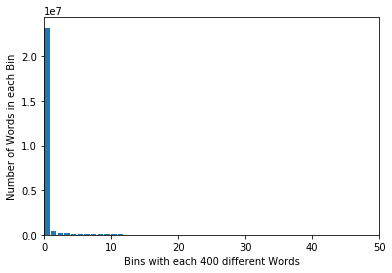

In [9]:
print("Total number of words in Training Data:", len(np.hstack(x_train)))
bins = 50
x = np.arange(bins)
hist, bin_edges = np.histogram(x_train, bins)
plt.xlim([0,bins])
plt.xlabel('Bins with each %i different Words' %(top_words/bins))
plt.ylabel('Number of Words in each Bin')
plt.bar(x, hist, align='edge')
plt.show()

## MLP

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          640000    
_________________________________________________________________
flatten (Flatten)            (None, 32000)             0         
_________________________________________________________________
dropout (Dropout)            (None, 32000)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                320010    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 960,021
Trainable params: 960,021
Non-trainable params: 0
__________________________________________________

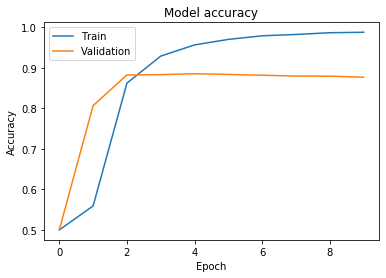

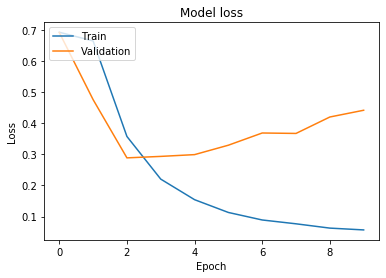

Final test loss and accuracy : [0.4424912354850769, 0.8766]


In [10]:
batch_size = 128
model = keras.models.Sequential()
model.add(keras.layers.Embedding(top_words, 32, input_length=max_review_length))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size = batch_size, epochs = 10, validation_data = (x_test, y_test), verbose = 1)
score = model.evaluate(x_test, y_test, batch_size = batch_size, verbose = 2)

plotHistory(history)
print("Final test loss and accuracy :", score)

## CNN

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          640000    
_________________________________________________________________
conv1d (Conv1D)              (None, 1000, 32)          3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 500, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                320020    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 963,145
Trainable params: 963,145
Non-trainable params: 0
________________________________________________

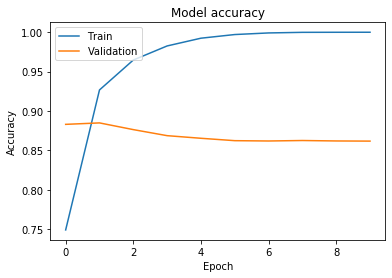

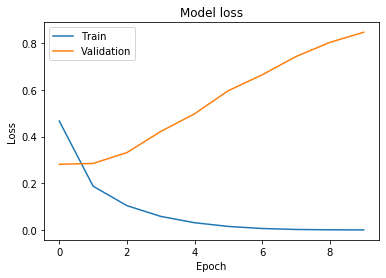

Final test loss and accuracy : [0.8467501047897339, 0.86176]


In [11]:
batch_size = 128
model = keras.models.Sequential()
model.add(keras.layers.Embedding(top_words, 32, input_length = max_review_length))
model.add(keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size = batch_size, epochs = 10, validation_data = (x_test, y_test), verbose = 1)
score = model.evaluate(x_test, y_test, batch_size = batch_size, verbose = 2)

plotHistory(history)
print("Final test loss and accuracy :", score)

## RNN

In [ ]:
batch_size = 32
model = keras.models.Sequential()
model.add(keras.layers.Embedding(top_words, output_dim = 32, input_length = max_review_length))
model.add(keras.layers.SimpleRNN(80, activation='relu', dropout = 0.5))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size = batch_size, epochs = 10, validation_data = (x_test, y_test), verbose = 1)
score = model.evaluate(x_test, y_test, batch_size = batch_size, verbose = 2)

plotHistory(history)
print("Final test loss and accuracy :", score)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 32)          640000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 80)                9040      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 81        
Total params: 649,121
Trainable params: 649,121
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 539s 22ms/sample - loss: 1373634.5950 - accuracy: 0.6250 - val_loss: 0.4324 - val_accuracy: 0.7991
Epoch 2/10
21376/25000 [========================>.....] - ETA: 1:08 - loss: 0.3643 - accuracy: 0.8414

## LSTM

In [ ]:
batch_size = 32
model = keras.models.Sequential()
model.add(keras.layers.Embedding(top_words, output_dim = 32, input_length=max_review_length))
model.add(keras.layers.LSTM(40, dropout=0.2, recurrent_dropout=0.2))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

print(model.summary())

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = batch_size, epochs = 10, validation_data = (x_test, y_test), verbose = 1)
score = model.evaluate(x_test, y_test, batch_size = batch_size, verbose = 2)

plotHistory(history)
print("Final test loss and accuracy :", score)

## Bidirectional LSTM

In [ ]:
batch_size = 32
model = keras.models.Sequential()
model.add(keras.layers.Embedding(top_words, output_dim = 128, input_length=max_review_length))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(20, dropout=0.2, recurrent_dropout=0.2)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

print(model.summary())

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = batch_size, epochs = 10, validation_data = (x_test, y_test), verbose = 1)
score = model.evaluate(x_test, y_test, batch_size = batch_size, verbose = 2)

plotHistory(history)
print("Final test loss and accuracy :", score)

## Small LSTM

In [ ]:
batch_size = 32
model = keras.models.Sequential()
model.add(keras.layers.Embedding(top_words, output_dim = 128, input_length=max_review_length))
model.add(keras.layers.LSTM(4, dropout=0.2, recurrent_dropout=0.2))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

print(model.summary())

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = batch_size, epochs = 10, validation_data = (x_test, y_test), verbose = 1)
score = model.evaluate(x_test, y_test, batch_size = batch_size, verbose = 2)

plotHistory(history)
print("Final test loss and accuracy :", score)

In [ ]:
from termcolor import colored

# Reload Dataset with complete text
(X_train_plot, y_train), (X_test_plot, y_test) = keras.datasets.imdb.load_data()

def plotReviewDB(test_or_train, review_id):
    word_to_id = keras.datasets.imdb.get_word_index()
    word_to_id = {k:(v+3) for k,v in word_to_id.items()}
    word_to_id["<padded>"] = 0
    word_to_id["<start>"] = 1
    word_to_id["<unknown>"] = 2

    sentiment = 0
    id_to_word = {value:key for key,value in word_to_id.items()}
    if test_or_train is 'train':
        print(' '.join(id_to_word[id] for id in X_train_plot[review_id] ))
        sentiment = y_train[review_id]
    else:
        print(' '.join(id_to_word[id] for id in X_test_plot[review_id] ))
        sentiment = y_test[review_id]
    if sentiment == 0:
        print(colored('Review is labelled as Negative', 'red'))
    if sentiment == 1:
        print(colored('Review is labelled as Positive', 'green'))
        
def predictSentimentLSTM(model, review_id):
    prediction = model.predict(x_test[review_id].reshape([1,max_review_length]), batch_size = batch_size, verbose = 2)
    if prediction == 0:
        print(colored('Review predicted to be Negative', 'red'))
    if prediction >= 1:
        print(colored('Review predicted to be Positive', 'green'))
    print('Groundtruth:')
    plotReviewDB('test', review_id)

In [ ]:
predictSentimentLSTM(model,1)

## Ähnliche Netze 
Analyse der Wertung - Cloudimplementierung: https://app.monkeylearn.com/main/classifiers/cl_pi3C7JiL/

## Quellen
Allgemeine Einführung: https://towardsdatascience.com/deep-learning-for-sentiment-analysis-7da8006bf6c1 <br>
LSTMs: https://colah.github.io/posts/2015-08-Understanding-LSTMs/ <br>
Netflix-Reviews Klassifikator: https://towardsdatascience.com/sentiment-analysis-with-deep-learning-62d4d0166ef6 <br>
... dazugehöriger GitHub-Code: https://github.com/artem-oppermann/Sentiment-Analysis-of-Netflix-Reviews
